In [ ]:
from keras import datasets

# import mnist dataset as train and test
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)         # 60k train images of 28x28
assert x_test.shape == (10000, 28, 28)          # 10k test images of 28x28
assert y_train.shape == (60000,)                # 60k train labels
assert y_test.shape == (10000,)                 # 10k test labels

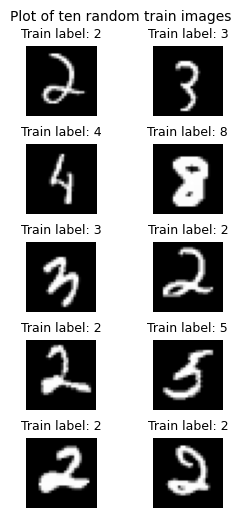

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# plot random sample of 10 train images and their labels
rand_vals = np.random.randint(0, len(x_train), size=10)
    
# Plot each image and its label
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(3, 6))
axes = axes.flatten()
fig.suptitle("Plot of ten random train images", fontsize=10, y=0.94)
plt.subplots_adjust(hspace=0.4)

# iterate over random values
for i, val in enumerate(rand_vals):
    image = x_train[val]
    label = y_train[val]
    
    ax = axes[i]
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f"Train label: {label}", fontsize=9)
plt.show()

In [157]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# input shape
x_train_shape = x_train.shape[1:]

# create linear model
model = Sequential([
    Input(shape=x_train_shape),
    Flatten(),
    Dense(units=256, activation='relu', name='Layer'),
    Dense(units=128, activation='relu', name='FirstLayer'),
    Dense(units=64, activation='relu', name='SecondLayer'),
    Dense(units=32, activation='relu', name='ThirdLayer'),
    Dense(units=10, activation='softmax', name='OutputLayer')
], name='MultilayeredNN')

# model summary
model.summary()

# compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

# Callbacks for early stopping, learning rate reduction, and saving best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('models/best_model.keras', save_best_only=True)

Model: "MultilayeredNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FirstLayer (Dense)              │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ SecondLayer (Dense)             │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ThirdLayer (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
# fit model
model_fit = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5846 - loss: 2.2508 - val_accuracy: 0.8892 - val_loss: 0.3835
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9202 - loss: 0.2924 - val_accuracy: 0.9434 - val_loss: 0.2225
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9505 - loss: 0.1848 - val_accuracy: 0.9460 - val_loss: 0.2060
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.1346 - val_accuracy: 0.9603 - val_loss: 0.1576
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9683 - loss: 0.1155 - val_accuracy: 0.9639 - val_loss: 0.1393
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0887 - val_accuracy: 0.9638 - val_loss: 0.1530
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0790 - val_accuracy: 0.9656 - val_loss: 0.1355
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9801 - loss: 0.0697 - 

In [159]:
# evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.9676 - loss: 0.1347
Test Loss: 0.1134793609380722, Test Accuracy: 0.9735000133514404


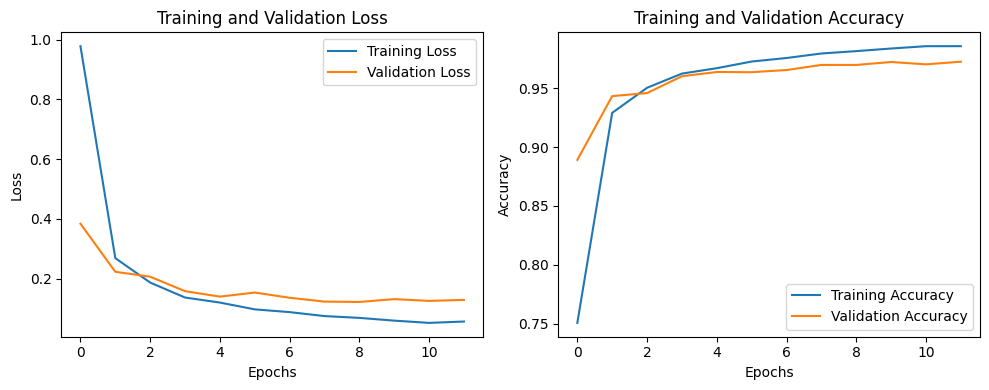

In [160]:
# Extract loss and accuracy values from the history object
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
train_accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)  # (rows, columns, subplot number)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step


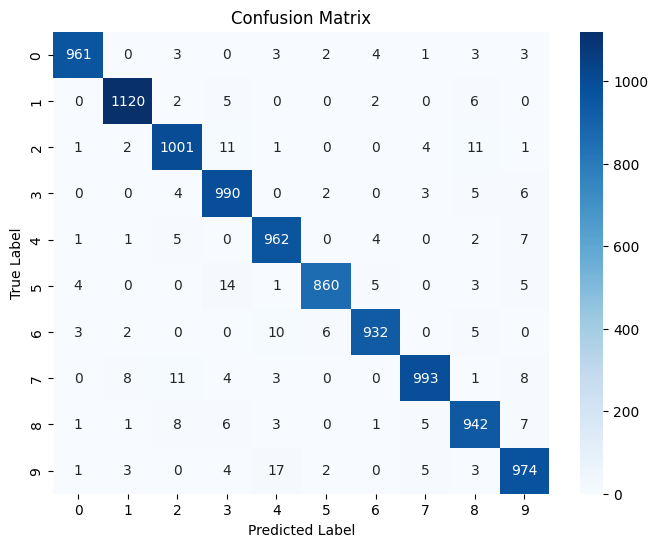

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert probability to class label

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()